In [106]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = None

# Clean data
df = None


def draw_line_plot():
    # Draw line plot





    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = None

    # Draw bar plot





    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)





    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


In [103]:
df=pd.read_csv('fcc-forum-pageviews.csv', parse_dates= ['date'], index_col='date')

In [104]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [19]:
cleanDf = df.loc[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975)) ]

Text(0, 0.5, 'Page Views')

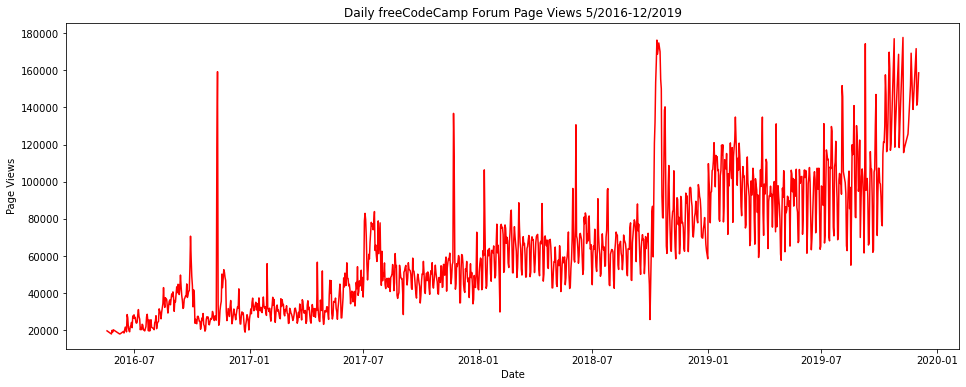

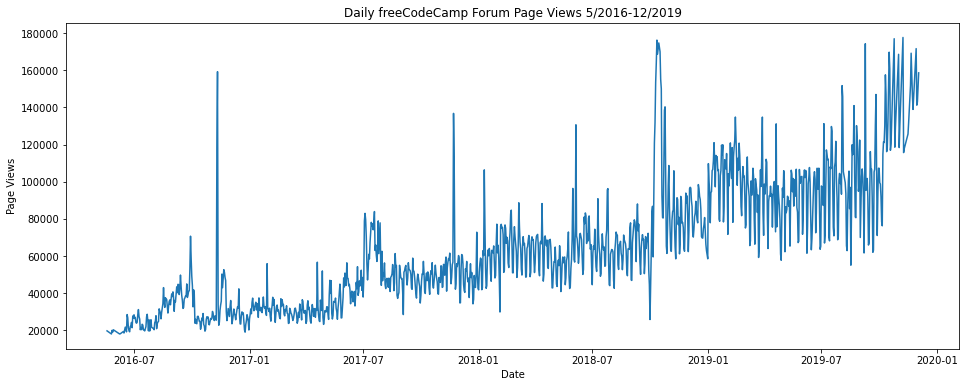

In [28]:
fig, axes = plt.subplots(figsize=(16, 6))
axes.plot(cleanDf.index, cleanDf['value'], color = 'red')
axes.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
axes.set_xlabel('Date')
axes.set_ylabel('Page Views')

plt.figure(figsize=(16, 6))
plt.plot(cleanDf.index, cleanDf['value'])
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')


Text(0, 0.5, 'Average Page Views')

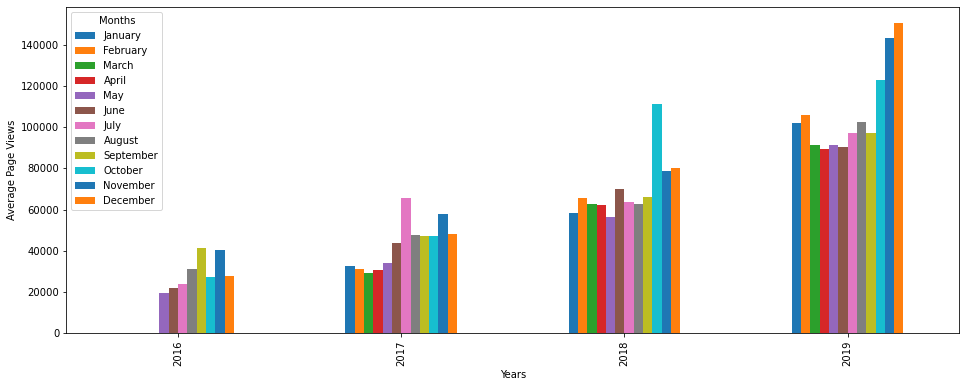

In [122]:
#fig,axes = plt.subplots(figsize=(16, 6))
#axes.bar(cleanDf.index, cleanDf['value'])
ddf = cleanDf.reset_index()
ddf['month'] = pd.DatetimeIndex(ddf['date']).month
ddf['year'] = pd.DatetimeIndex(ddf['date']).year
ddf.replace({
    'month': {1: 'January', 
             2 : 'February', 
             3 : 'March',
             4 : 'April',
              5 : 'May',
              6 : 'June',
              7 : 'July',
              8 : 'August',
              9 : 'September',
              10 : 'October',
              11 : 'November',
              12 : 'December',
            }}, inplace=True)
pd.to_datetime(ddf['year'])

ddf.drop(['date'], axis=1,inplace=True)
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
ddf["month"] = pd.Categorical(ddf["month"], categories=months)

df_pivot = pd.pivot_table(
 ddf,
 values="value",
 index="year",
 columns="month",
 aggfunc=np.mean
)
axes = df_pivot.plot(kind="bar")
fig=axes.get_figure()
fig.set_size_inches(16,6)
axes.legend(title='Months')
axes.set_xlabel('Years')
axes.set_ylabel('Average Page Views')
#ddf.loc[ddf['year']==2016, ['value','month']]

#axes = ddf.groupby('month')['value'].plot(kind='bar', legend=True)
#axes.bar(ddf.loc[ddf['year']==2016, 'month'], ddf.loc[ddf['year']==2016, 'value'])

Text(0, 0.5, 'Page Views')

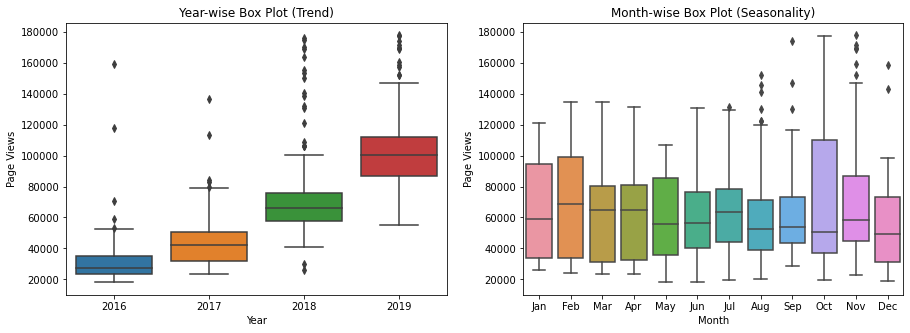

In [140]:
df_box = cleanDf.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_box["month"] = pd.Categorical(df_box["month"], categories=months)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(ax=axes[0], x='year', y='value', data=df_box)
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")
sns.boxplot(ax=axes[1], x='month', y='value', data=df_box)
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")
